In [1]:
import pandas as pd
import numpy as np

# 读取并处理数据
grayscale values(-1,1)，值越大越接近白色

In [2]:
# num3:658 rows num2:731 rows
df_num3 = pd.read_csv('dataset/three.csv', header=None)
df_num2 = pd.read_csv('dataset/two.csv', header=None)

# 添加标签
df_num3.insert(0,'Label', np.full(658, 3))
df_num2.insert(0,'Label', np.full(731, 2))

# 组合数据
df_combined = pd.concat([df_num3, df_num2], ignore_index=True)
df_combined.columns= df_combined.columns.astype(str) # 将列名都转换为相同类型，不然会报错

# 打乱数据
df_combined = df_combined.sample(frac=1).reset_index(drop=True)

In [3]:
df_combined

,Label,0,1,2,3,4,5,6,7,8,...,246,247,248,249,250,251,252,253,254,255
0,3,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0
1,3,-1.0,-1.0,-1.000,-1.000,-0.981,-0.911,-0.560,0.286,0.928,...,0.625,0.045,-0.307,-0.943,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0
2,3,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.936,...,-1.000,-1.000,-0.633,0.236,0.810,1.000,0.874,-0.383,-1.0,-1.0
3,2,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0
4,3,-1.0,-1.0,-1.000,-1.000,-0.707,0.104,0.751,1.000,1.000,...,0.716,0.269,-0.547,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,3,-1.0,-1.0,-1.000,-1.000,-1.000,-0.662,0.063,0.705,1.000,...,-0.041,0.615,1.000,0.858,-0.264,-0.975,-1.000,-1.000,-1.0,-1.0
1385,3,-1.0,-1.0,-1.000,-0.730,-0.593,-0.679,-0.182,0.289,0.640,...,0.853,0.871,0.908,0.423,-0.370,-0.941,-1.000,-1.000,-1.0,-1.0
1386,2,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0
1387,2,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0


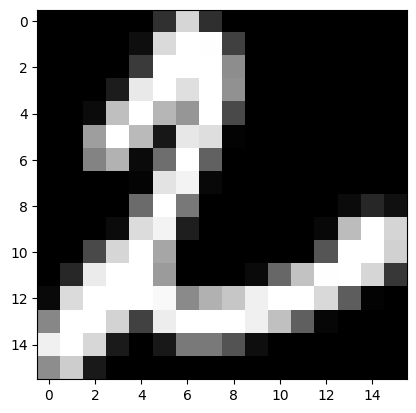

In [4]:
import matplotlib.pyplot as plt
# show num
data = np.array(df_combined.iloc[6,1:]).reshape(16, 16)
plt.imshow(data, cmap='gray')
plt.show()

# k-Nearest Neighbor

In [5]:
# train_loss:训练好的模型对训练集的效果
# test_loss:模型对训练集的效果

In [6]:
#划分数据
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(df_combined, df_combined.iloc[:, 0], test_size=0.2, random_state=42)

Test Accuracy for k=1: 0.9892
Train MSE for k=1: 0.0000, Test MSE: 0.0108
Test Accuracy for k=3: 0.9928
Train MSE for k=3: 0.0054, Test MSE: 0.0072
Test Accuracy for k=5: 1.0000
Train MSE for k=5: 0.0054, Test MSE: 0.0000
Test Accuracy for k=7: 0.9928
Train MSE for k=7: 0.0072, Test MSE: 0.0072
Test Accuracy for k=15: 0.9892
Train MSE for k=15: 0.0090, Test MSE: 0.0108


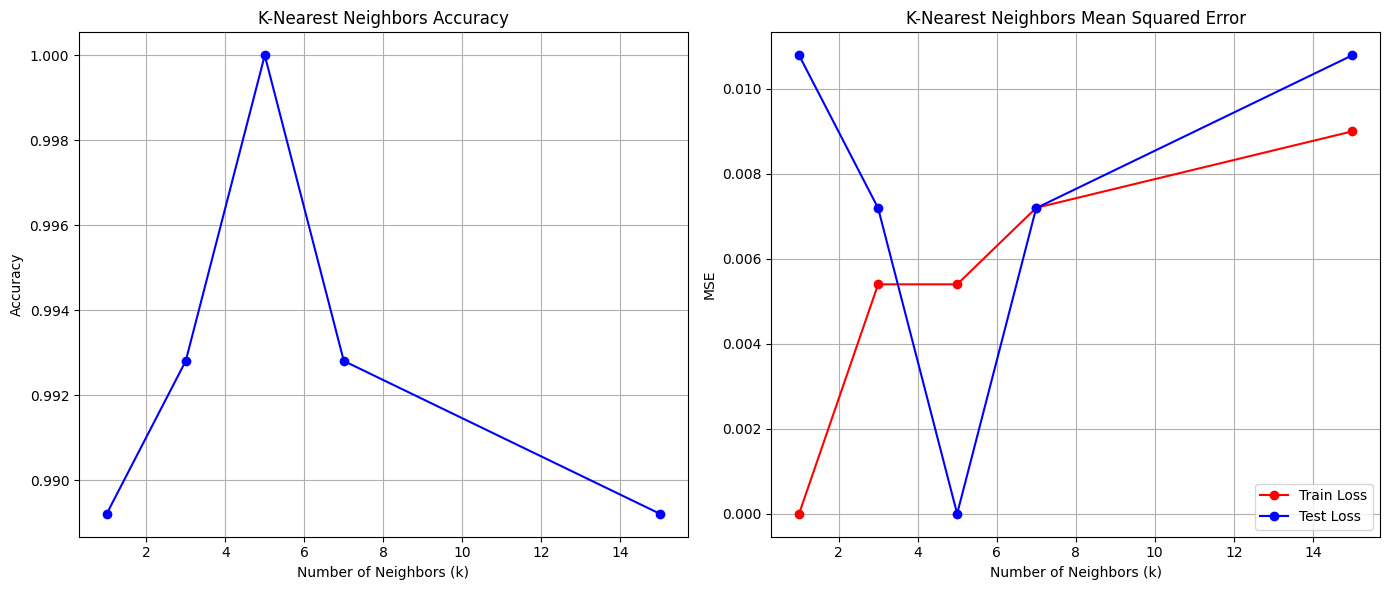

In [7]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

k_values = [1, 3, 5, 7, 15]
accuracy_scores = []
train_mse = []
test_mse = []

# 遍历不同k值的KNN模型并计算accuracy, train_loss和test_loss
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    
    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)
    
    # 计算训练集和测试集的准确度
    test_accuracy = accuracy_score(y_test, y_test_predict)

    # 计算mse
    mse_train = mean_squared_error(y_train, y_train_predict)
    mse_test = mean_squared_error(y_test, y_test_predict)
    
    accuracy_scores.append(test_accuracy)
    train_mse.append(mse_train)
    test_mse.append(mse_test)
    
    print(f"Test Accuracy for k={k}: {test_accuracy:.4f}")
    print(f"Train MSE for k={k}: {mse_train:.4f}, Test MSE: {mse_test:.4f}")

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# pic1: 测试集准确度
ax[0].plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
ax[0].set_title('K-Nearest Neighbors Accuracy')
ax[0].set_xlabel('Number of Neighbors (k)')
ax[0].set_ylabel('Accuracy')
ax[0].grid(True)

# pic2: 训练MSE和测试MSE
ax[1].plot(k_values, train_mse, marker='o', linestyle='-', color='r', label='Train Loss')
ax[1].plot(k_values, test_mse, marker='o', linestyle='-', color='b', label='Test Loss')
ax[1].set_title('K-Nearest Neighbors Mean Squared Error')
ax[1].set_xlabel('Number of Neighbors (k)')
ax[1].set_ylabel('MSE')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

# Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

# 模型训练
model = LinearRegression()
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

# 将预测值转换为整数
y_test_pred_classes = np.round(y_test_pred).astype(int)
y_train_pred_classes = np.round(y_train_pred).astype(int)

accuracy = accuracy_score(y_test, y_test_pred_classes)
print(f'Test Accuracy: {accuracy:.4f}')

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Train Loss: {train_mse:.4f}')
print(f'Test Loss: {test_mse:.4f}')

Test Accuracy: 1.0000
Train Loss: 0.0000
Test Loss: 0.0000
